In [1]:
from sklearn.pipeline import Pipeline
from src.preprocesing.data_loader import DataLoader
from src.preprocesing.flight_filter import FlightFilter
from src.features.trajectory_calculator import TrajectoryCalculator

departure = 'LEMD'
destinations = [
  'LEAS',
  'LEBB',
  'LEBL',
  'LECO',
  'LEGR',
  'LEJR'
]

flights_path = 'data/flights'
flights_points_path = 'data/flight_points'

pipeline = Pipeline([
    ('data_loader', DataLoader(flights_path, flights_points_path)),
    ('flight_filter', FlightFilter(departure, destinations)),
    ('trajectory_calculator', TrajectoryCalculator())])

result = pipeline.transform(None)
trajectories = result['trajectories']

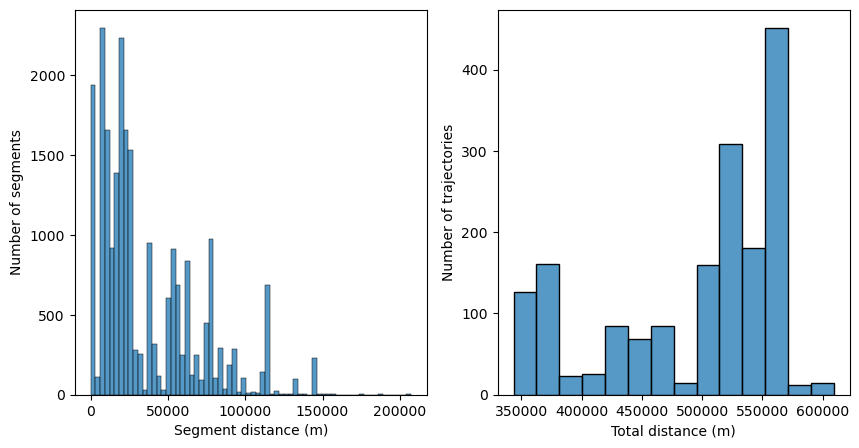

In [2]:
from utils.distances import calculate_total_distance, calculate_point_distances
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula las distancias totales y los tramos entre puntos para cada trayectoria
total_distances = []
point_distances = []
for trajectory in trajectories:
    total_distances.append(calculate_total_distance(trajectory))
    point_distances.extend(calculate_point_distances(trajectory))

# Crea una figura con dos subtramas
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Crea el primer histograma con las distancias de los tramos entre puntos
sns.histplot(point_distances, ax=ax)
ax.set_xlabel('Segment distance (m)')
ax.set_ylabel('Number of segments')

# Crea el segundo histograma con las distancias totales de las trayectorias
sns.histplot(total_distances, ax=ax2)
ax2.set_xlabel('Total distance (m)')
ax2.set_ylabel('Number of trajectories')

plt.savefig('results/graphs/exploration/initial_distribution.png', dpi=300)
plt.show()

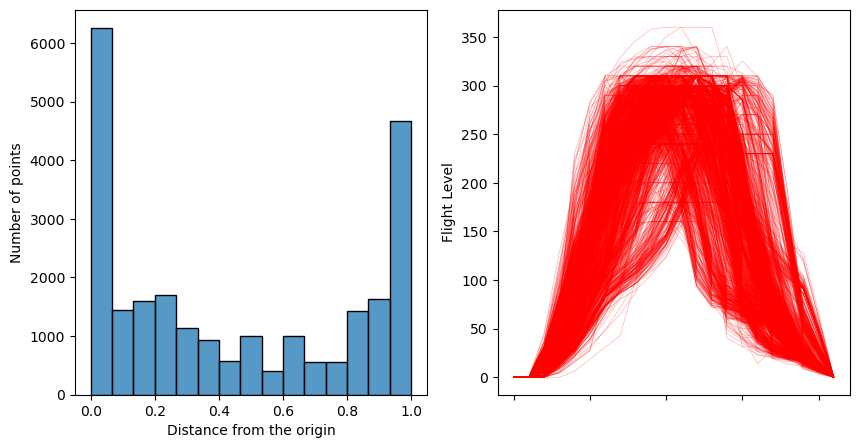

In [3]:
from utils.graphs import accumulated_distance, altitude_profile

filtered_trajectories = [trajectory for trajectory in trajectories]

# Crea una figura con dos subtramas
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 5))

accumulated_distance(filtered_trajectories, ax)

altitude_profile(filtered_trajectories, ax2)

plt.savefig('results/graphs/exploration/first_normalization_distribution.png', dpi=300)
plt.show()

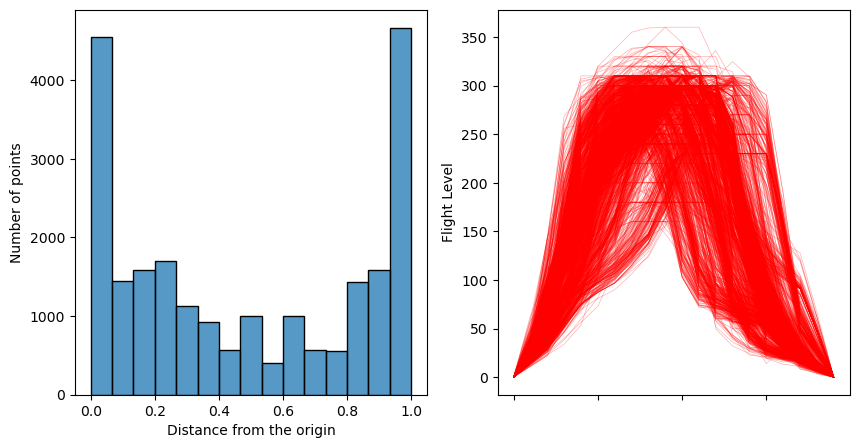

In [4]:
from utils.trajectories import remove_taxi
from utils.graphs import accumulated_distance, altitude_profile

filtered_trajectories = [remove_taxi(trajectory) for trajectory in trajectories]

# Crea una figura con dos subtramas
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 5))

accumulated_distance(filtered_trajectories, ax)

altitude_profile(filtered_trajectories, ax2)

plt.savefig('results/graphs/exploration/taxi_normalization_distribution.png', dpi=300)
plt.show()

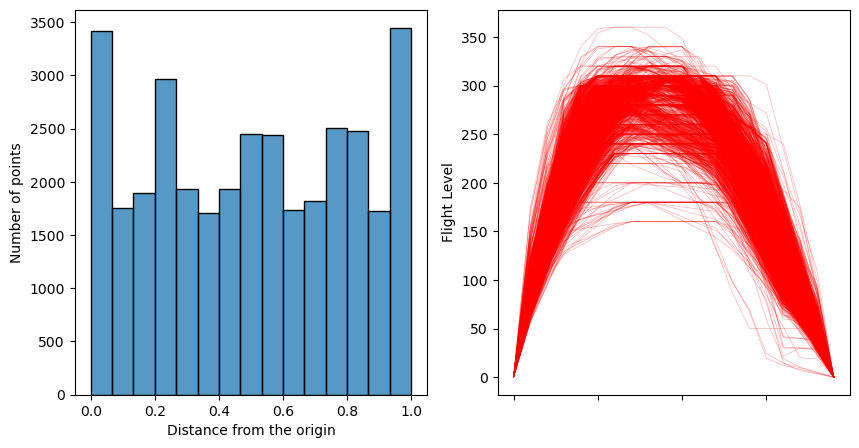

In [5]:
from utils.trajectories import remove_taxi
from utils.graphs import accumulated_distance, altitude_profile
from utils.trajectories import interpolate_trajectory

normalized_trajectories = [remove_taxi(trajectory) for trajectory in trajectories]
points_num = max([len(trajectory) for trajectory in normalized_trajectories])
interpolated_trajectories = [interpolate_trajectory(trajectory, points_num) for trajectory in normalized_trajectories]

# Crea una figura con dos subtramas
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 5))

accumulated_distance(interpolated_trajectories, ax)

altitude_profile(interpolated_trajectories, ax2)

plt.savefig('results/graphs/exploration/interpolation_distribution.png', dpi=300)
plt.show()